In [9]:
import numpy as np
import random
import mpmath as mp
import pandas as pd
mp.dps=40

In [2]:
def ABCindeks(drevo): #izracun ABC indeksa za neko drevo, len(drevo[u]) ti da dolzino seznama sosedov za vozlisce u torej je to stopnja vozlisca u
    produkt = 1
    for u in drevo:
        for v in drevo[u]:
            produkt = produkt * (len(drevo[u]) + len(drevo[v]) - 2) / (len(drevo[u]) * len(drevo[v]))
    return sqrt(produkt)

#ABCindeks(G)

In [3]:
def minABCindeks(n): #izracun najmanjsega ABC indeksa za vsa drevesa z n vozlisci, vrne tudi seznam dreves, ki imajo ta najmanjsi indeks
    min_indeks = None
    for dr in graphs.trees(n):
        if min_indeks == None:
            min_indeks = ABCindeks(dr)
            drevesa_z_min_ind = [dr]
        else:
            if ABCindeks(dr) < min_indeks:
                min_indeks = ABCindeks(dr)
                drevesa_z_min_ind = [dr]
            elif ABCindeks(dr) == min_indeks:
                drevesa_z_min_ind.append(dr)
            else:
                continue
    return min_indeks , drevesa_z_min_ind

#minABCindeks(9)

In [40]:
rezultati = []
for n in range(17) : #range naredi seznam od 0 do 18, midva hoceva grafe z vozlisci od 1 do 19 zato je spodaj n+1
        rez = [vrednost, seznam_grafov] = minABCindeks(n+1)
        rezultati.append(rez)
rezultati #rabu je okol 10 min (za 19)

[(1, [Graph on 1 vertex]),
 (0, [Graph on 2 vertices]),
 (1/4, [Graph on 3 vertices]),
 (1/8, [Graph on 4 vertices]),
 (1/16, [Graph on 5 vertices]),
 (1/32, [Graph on 6 vertices]),
 (1/64, [Graph on 7 vertices, Graph on 7 vertices]),
 (1/128, [Graph on 8 vertices, Graph on 8 vertices]),
 (1/256,
  [Graph on 9 vertices,
   Graph on 9 vertices,
   Graph on 9 vertices,
   Graph on 9 vertices]),
 (1/576, [Graph on 10 vertices]),
 (1/1152, [Graph on 11 vertices]),
 (5/12288, [Graph on 12 vertices]),
 (1/5184, [Graph on 13 vertices]),
 (3/32768, [Graph on 14 vertices]),
 (25/589824, [Graph on 15 vertices]),
 (25/1179648, [Graph on 16 vertices, Graph on 16 vertices]),
 (5/524288, [Graph on 17 vertices])]

In [18]:
def SA_algoritem_koraki(n, T=100, fun=ABCindeks): #algoritem za iskanje drevesa z najmanjšim ABC indeksom za drevesa z več vozlišči. Algoritm vrne min_indekse in pripajadoca drevesa po 100, 1000 in 10000 korakih
    drevo =graphs.RandomTree(n)
    scale = np.sqrt(T)
    trenutna_vrednost = fun(drevo)
    history = [drevo]
    for i in range(10000):
        listi_drevesa = []
        stopnje_vozlisc = drevo.degree()
        for i in range(n):
            if stopnje_vozlisc[i] == 1:
                listi_drevesa.append(i)               ### sedaj imamo vse liste drevesa
        stevilo_listov = len(listi_drevesa)
        nakljucni_list = listi_drevesa[random.randint(0,stevilo_listov - 1)] ### izberemo nakljucni list
        popravek = copy(drevo)   ### ustvarimo kopijo drevesa na katerem bomo izvedli zamenjavo
        ostala_vozlisca = [x for x in popravek.vertices() if x!=nakljucni_list]
        povezava = (nakljucni_list, drevo[nakljucni_list][0]) ### list bo imel le enega soseda
        popravek.delete_edge(povezava)
        izbrano_vozlisce = ostala_vozlisca[random.randint(0, len(ostala_vozlisca) -1)]
        popravek.add_edge(nakljucni_list, izbrano_vozlisce) #### dodamo povezavo na kopiji
        vrednost_popravka = fun(popravek)
        if (trenutna_vrednost > vrednost_popravka) or (mp.exp((-(vrednost_popravka - trenutna_vrednost)/T)) > random.random()): ### popravek je sprejet ce je bila vrednost popravka manjsa od trenutne vrednosti ali pa
            drevo = popravek
        trenutna_vrednost = fun(drevo)
        T = 0.9*T
        history.append(drevo)
    return fun(history[0]), fun(history[99]), fun(history[999]), fun(history[9999]), history[0], history[99],history[999], history[9999]

In [23]:
rezultati_koraki = []
for i in range(10,36):
    (k0, k100, k1000, k10000,g0, g100, g1000, g10000) = SA_algoritem_koraki(i)
    rezultati_koraki.append((i, float(k0), float(k100), float(k1000), float(k10000),g0, g100, g1000, g10000))

In [25]:
vrednosti_koraki = []
for element in rezultati_koraki:
    (n, k0, k100, k1000, k10000,g0, g100, g1000, g10000) = element
    vrednosti_koraki.append((n,  k0, k100, k1000, k10000))

In [28]:
df = pd.DataFrame(vrednosti_koraki, columns =['Stevilo vozlisc', 'K0', 'K100','K1000', 'K10000']) 
df #### opazimo, da je 1000 korakov ze dovolj

,Stevilo vozlisc,K0,K100,K1000,K10000
0,10,3.472222e-03,3.255208e-03,1.953125e-03,1.953125e-03
1,11,2.314815e-03,4.629630e-03,8.680556e-04,8.680556e-04
2,12,7.324219e-04,1.831055e-03,4.340278e-04,4.340278e-04
3,13,1.517037e-03,7.716049e-04,2.170139e-04,2.170139e-04
4,14,4.069010e-04,6.149781e-04,1.085069e-04,1.085069e-04
5,15,1.085069e-04,1.356337e-04,6.103516e-05,6.103516e-05
6,16,1.017253e-04,4.069010e-05,2.712674e-05,2.712674e-05
7,17,2.679184e-05,7.938322e-05,1.525879e-05,1.525879e-05
8,18,3.906250e-05,2.411265e-05,6.028164e-06,6.028164e-06
9,19,5.722046e-05,7.535204e-06,3.390842e-06,3.390842e-06


In [29]:
def SA_algoritem(n, T=100, fun=ABCindeks): #algoritem za iskanje drevesa z najmanjšim ABC indeksom za drevesa z več vozlišči
    drevo =graphs.RandomTree(n)
    scale = np.sqrt(T)
    trenutna_vrednost = fun(drevo)
    history = [drevo]
    for i in range(10000):
        listi_drevesa = []
        stopnje_vozlisc = drevo.degree()
        for i in range(n):
            if stopnje_vozlisc[i] == 1:
                listi_drevesa.append(i)               ### sedaj imamo vse liste drevesa
        stevilo_listov = len(listi_drevesa)
        nakljucni_list = listi_drevesa[random.randint(0,stevilo_listov - 1)] ### izberemo nakljucni list
        popravek = copy(drevo)   ### ustvarimo kopijo drevesa na katerem bomo izvedli zamenjavo
        ostala_vozlisca = [x for x in popravek.vertices() if x!=nakljucni_list]
        povezava = (nakljucni_list, drevo[nakljucni_list][0]) ### list bo imel le enega soseda
        popravek.delete_edge(povezava)
        izbrano_vozlisce = ostala_vozlisca[random.randint(0, len(ostala_vozlisca) -1)]
        popravek.add_edge(nakljucni_list, izbrano_vozlisce) #### dodamo povezavo na kopiji
        vrednost_popravka = fun(popravek)
        if (trenutna_vrednost > vrednost_popravka) or (mp.exp((-(vrednost_popravka - trenutna_vrednost)/T)) > random.random()): ### popravek je sprejet ce je bila vrednost popravka manjsa od trenutne vrednosti ali pa
            drevo = popravek
        trenutna_vrednost = fun(drevo)
        T = 0.9*T
        history.append(drevo)
    return trenutna_vrednost, fun(history[0]), drevo

In [30]:
rezultati2 = []
for n in range(10,36):
        [vrednost, prvotna_vrednost, drevo] = SA_algoritem(n)
        rezultati2.append((vrednost, drevo))
for i in range(len(rezultati2)):
    (val, tree) = rezultati2[i]
    rezultati2[i] = (float(val), tree)
rezultati2 #rabu okol 4 minute da je zracunu

[(1/512, Graph on 10 vertices),
 (1/1152, Graph on 11 vertices),
 (1/2048, Graph on 12 vertices),
 (5/24576, Graph on 13 vertices),
 (1/8192, Graph on 14 vertices),
 (1/18432, Graph on 15 vertices),
 (1/36864, Graph on 16 vertices),
 (5/442368, Graph on 17 vertices),
 (1/147456, Graph on 18 vertices),
 (5/1769472, Graph on 19 vertices),
 (1/589824, Graph on 20 vertices),
 (1/1179648, Graph on 21 vertices),
 (1/2654208, Graph on 22 vertices),
 (5/28311552, Graph on 23 vertices),
 (1/9437184, Graph on 24 vertices),
 (1/21233664, Graph on 25 vertices),
 (1/37748736, Graph on 26 vertices),
 (1/83886080, Graph on 27 vertices),
 (125/41278242816, Graph on 28 vertices),
 (1/268435456, Graph on 29 vertices),
 (5/3221225472, Graph on 30 vertices),
 (5/6442450944, Graph on 31 vertices),
 (25/77309411328, Graph on 32 vertices),
 (25/173946175488, Graph on 33 vertices),
 (1/13759414272, Graph on 34 vertices),
 (5/115964116992, Graph on 35 vertices)]

[(0.001953125, Graph on 10 vertices),
 (0.0008680555555555555, Graph on 11 vertices),
 (0.00048828125, Graph on 12 vertices),
 (0.00020345052083333334, Graph on 13 vertices),
 (0.0001220703125, Graph on 14 vertices),
 (5.425347222222222e-05, Graph on 15 vertices),
 (2.712673611111111e-05, Graph on 16 vertices),
 (1.1302806712962962e-05, Graph on 17 vertices),
 (6.781684027777777e-06, Graph on 18 vertices),
 (2.8257016782407406e-06, Graph on 19 vertices),
 (1.6954210069444444e-06, Graph on 20 vertices),
 (8.477105034722222e-07, Graph on 21 vertices),
 (3.767602237654321e-07, Graph on 22 vertices),
 (1.7660635489004629e-07, Graph on 23 vertices),
 (1.0596381293402777e-07, Graph on 24 vertices),
 (4.709502797067901e-08, Graph on 25 vertices),
 (2.6490953233506943e-08, Graph on 26 vertices),
 (1.1920928955078126e-08, Graph on 27 vertices),
 (3.0282296791846073e-09, Graph on 28 vertices),
 (3.725290298461914e-09, Graph on 29 vertices),
 (1.5522042910257976e-09, Graph on 30 vertices),
 (7.76

In [101]:
# recimo da naju zanimajo premeri teh grafov, uporabiva lahko metodo diameter za objekte graphs
premeri = []
for (vrednost, seznam_grafov) in rezultati:
    pr = []
    for graf in seznam_grafov:
        pr.append(graf.diameter())
    premeri.append(pr)
print(premeri)

[[0], [1], [2], [3], [4], [5], [6, 4], [7, 5], [8, 6, 6, 4], [5], [6], [5], [6], [5], [6], [7, 6], [6]]


In [104]:
premeri2 = []
for (vrednost, graf) in rezultati2:
    premeri2.append([graf.diameter()])
print(premeri2)

[[5], [6], [7], [7], [7], [7], [11], [11], [7], [11], [13], [15], [16], [13], [15], [9], [13], [11], [12], [12], [10], [14], [12], [17], [12], [12]]


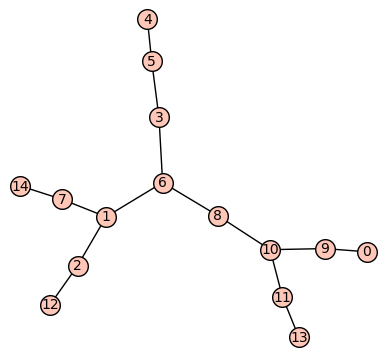

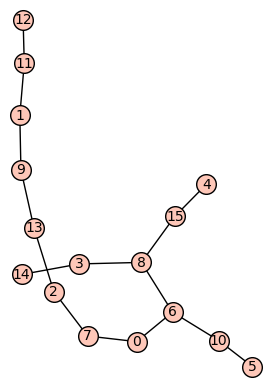

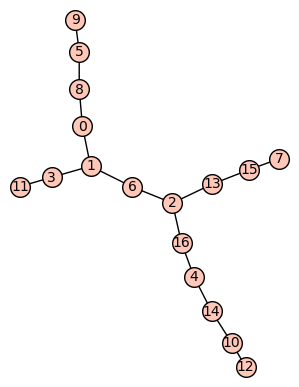

In [125]:
for i in range(5,8):
    show(rezultati2[i][1])

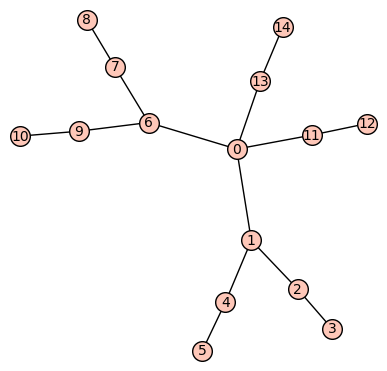

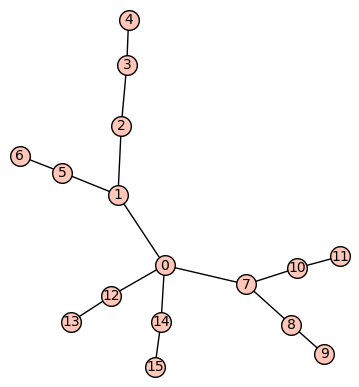

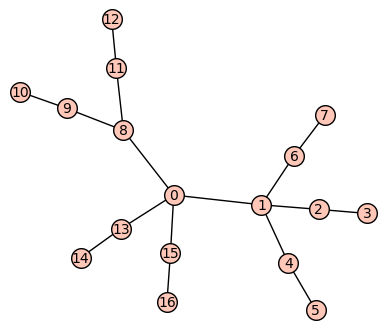

In [126]:
for i in range(14,17):
    show(rezultati[i][1][0])

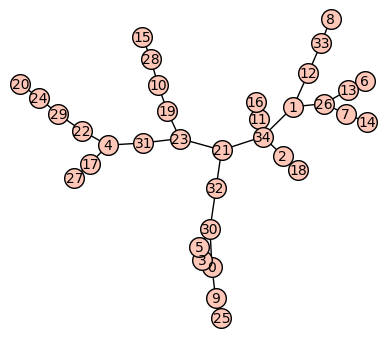

In [128]:
show(rezultati2[25][1])

In [113]:
#ce naju zanimajo dolzine najdaljsih poti v grafih 
def najdaljsa_pot(graf):
    najdaljsa = 0
    for u in graf:            #gremo cez vsa vozlisca v grafu
        if len(graf[u]) == 2:  #ce imajo stopnjo = 2 nadaljujemo
            soseda = graf[u]
            s = u #dolocimo sedanje vozlisce
            dolzina = 3        #sedaj imamo pot dolzine vsaj 3 - sedanje vozlišče in njegova soseda
            if len(graf[soseda[0]]) != 2: #preverimo ali ima vsaj eno od sosednjih vozlisc stopnjo neenako 2 (da ne zacnemo steti sredi poti)
                p = soseda[0] #dolocimo prejsnje vozlisce (tisto s stopnjo neenako 2)
                n = soseda[1] # in naslednje vozlisce
            elif len(graf[soseda[1]]) != 2:
                p = soseda[1]
                n = soseda[0]
            else: #ce imata obe sosednji vozlisci stopnjo 2 smo na sredi poti in tega primera ne preverjamo
                continue
            while len(graf[n]) == 2: #z while zanko se bomo sedaj premikali po poti dokler ne naletimo na vozlisce ki nima stopnje = 2
                dolzina += 1 #za vsako naslednje vozlisce povecamo dolzino
                p = s #premanemo vozlisca: novo prejsnje je staro sedanje,
                s = n #novo sedanje je staro naslednje
                if graf[s][0] != p: #novo naslednje je tisto od sosedov novega sedanjega ki ni enako novemu prejsnjemu
                    n = graf[s][0]
                else:
                    n = graf[s][1]
        else:
            continue
        if dolzina > najdaljsa: #ce smo nasli novo najdaljso pot jo shranimo
            najdaljsa = dolzina
    return najdaljsa

najdaljse_poti = []
for (vrednost, seznam_grafov) in rezultati:
    dol = []
    for graf in seznam_grafov:
        dol.append(najdaljsa_pot(graf))
    najdaljse_poti.append(dol)

print(najdaljse_poti)



[[0], [0], [3], [4], [5], [6], [7, 3], [8, 4], [9, 5, 4, 3], [3], [4], [3], [3], [3], [3], [4, 4], [3]]


In [114]:
### Longest thread SA
najdaljse_poti2 = []
for (vrednost, graf) in rezultati2:
    najdaljse_poti2.append([najdaljsa_pot(graf)])

print(najdaljse_poti2)

[[3], [4], [5], [5], [4], [4], [9], [6], [3], [5], [6], [9], [10], [6], [6], [5], [6], [5], [7], [5], [5], [6], [6], [5], [6], [5]]


In [19]:
### vozilisca s stopnjo >=3
povezave = []
for (vrednost, seznam_grafov) in rezultati:
    for graf in seznam_grafov:
        indeksi = []
        for u in graf:
            if len(graf[u]) >=3:
                indeksi.append(1)
            else:
                indeksi.append(0)
        povezave.append((graf.order(),indeksi, 'sum={}'.format(sum(indeksi)),'abc_indeks={}'.format(vrednost)))
        indeksi = []
povezave

[(1, [0], 'sum=0', 'abc_indeks=1'),
 (2, [0, 0], 'sum=0', 'abc_indeks=0'),
 (3, [0, 0, 0], 'sum=0', 'abc_indeks=1/4'),
 (4, [0, 0, 0, 0], 'sum=0', 'abc_indeks=1/8'),
 (5, [0, 0, 0, 0, 0], 'sum=0', 'abc_indeks=1/16'),
 (6, [0, 0, 0, 0, 0, 0], 'sum=0', 'abc_indeks=1/32'),
 (7, [0, 0, 0, 0, 0, 0, 0], 'sum=0', 'abc_indeks=1/64'),
 (7, [1, 0, 0, 0, 0, 0, 0], 'sum=1', 'abc_indeks=1/64'),
 (8, [0, 0, 0, 0, 0, 0, 0, 0], 'sum=0', 'abc_indeks=1/128'),
 (8, [1, 0, 0, 0, 0, 0, 0, 0], 'sum=1', 'abc_indeks=1/128'),
 (9, [0, 0, 0, 0, 0, 0, 0, 0, 0], 'sum=0', 'abc_indeks=1/256'),
 (9, [0, 1, 0, 0, 0, 0, 0, 0, 0], 'sum=1', 'abc_indeks=1/256'),
 (9, [1, 0, 0, 0, 0, 0, 0, 0, 0], 'sum=1', 'abc_indeks=1/256'),
 (9, [1, 0, 0, 0, 0, 0, 0, 0, 0], 'sum=1', 'abc_indeks=1/256'),
 (10, [1, 1, 0, 0, 0, 0, 0, 0, 0, 0], 'sum=2', 'abc_indeks=1/576'),
 (11, [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'sum=2', 'abc_indeks=1/1152'),
 (12, [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'sum=2', 'abc_indeks=5/12288'),
 (13, [1, 1, 0, 0, 0,

In [20]:
### koliko je vozlisc s samo eno povezavo (torej listov)
stevilo_listov = []
for (vrednost, seznam_grafov) in rezultati:
    for graf in seznam_grafov:
        listi = 0
        for u in graf:
            if len(graf[u]) ==1 :
                listi += 1
        stevilo_listov.append((graf.order(),listi))
        listi = 0
stevilo_listov

[(1, 0),
 (2, 2),
 (3, 2),
 (4, 2),
 (5, 2),
 (6, 2),
 (7, 2),
 (7, 3),
 (8, 2),
 (8, 3),
 (9, 2),
 (9, 3),
 (9, 3),
 (9, 4),
 (10, 4),
 (11, 4),
 (12, 5),
 (13, 5),
 (14, 6),
 (15, 6),
 (16, 6),
 (16, 6),
 (17, 7),
 (18, 7),
 (19, 8)]

In [115]:
#### koliko listov SA Algo
stevilo_listov2 = []
for (vrednost, graf) in rezultati2:
    listi = 0
    for u in graf:
        if len(graf[u]) == 1:
            listi += 1
    stevilo_listov2.append((graf.order(), listi))
    listi = 0
stevilo_listov2

[(10, 4),
 (11, 4),
 (12, 4),
 (13, 4),
 (14, 5),
 (15, 5),
 (16, 4),
 (17, 4),
 (18, 7),
 (19, 5),
 (20, 4),
 (21, 3),
 (22, 4),
 (23, 6),
 (24, 5),
 (25, 8),
 (26, 7),
 (27, 9),
 (28, 7),
 (29, 10),
 (30, 10),
 (31, 8),
 (32, 8),
 (33, 9),
 (34, 11),
 (35, 10)]

In [22]:
### stopnja vsakega vozlišča 
povezave_indeksi = []
for (vrednost, seznam_grafov) in rezultati:
    for graf in seznam_grafov:
        indeksi = []
        for u in graf:
            indeksi.append(len(graf[u]))
        povezave_indeksi.append((graf.order(),indeksi))
        indeksi = []
povezave_indeksi

[(1, [0]),
 (2, [1, 1]),
 (3, [2, 1, 1]),
 (4, [2, 2, 1, 1]),
 (5, [2, 2, 1, 2, 1]),
 (6, [2, 2, 2, 1, 2, 1]),
 (7, [2, 2, 2, 1, 2, 2, 1]),
 (7, [3, 2, 1, 2, 1, 2, 1]),
 (8, [2, 2, 2, 2, 1, 2, 2, 1]),
 (8, [3, 2, 2, 1, 2, 1, 2, 1]),
 (9, [2, 2, 2, 2, 1, 2, 2, 2, 1]),
 (9, [2, 3, 2, 1, 2, 1, 2, 2, 1]),
 (9, [3, 2, 2, 1, 2, 2, 1, 2, 1]),
 (9, [4, 2, 1, 2, 1, 2, 1, 2, 1]),
 (10, [3, 3, 2, 1, 2, 1, 2, 1, 2, 1]),
 (11, [3, 3, 2, 1, 2, 1, 2, 2, 1, 2, 1]),
 (12, [4, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1]),
 (13, [3, 3, 2, 1, 2, 1, 3, 2, 1, 2, 1, 2, 1]),
 (14, [4, 4, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1]),
 (15, [4, 3, 2, 1, 2, 1, 3, 2, 1, 2, 1, 2, 1, 2, 1]),
 (16, [4, 3, 2, 2, 1, 2, 1, 3, 2, 1, 2, 1, 2, 1, 2, 1]),
 (16, [4, 3, 2, 1, 2, 1, 3, 2, 1, 2, 1, 2, 2, 1, 2, 1]),
 (17, [4, 4, 2, 1, 2, 1, 2, 1, 3, 2, 1, 2, 1, 2, 1, 2, 1]),
 (18, [4, 3, 2, 1, 2, 1, 3, 2, 1, 2, 1, 3, 2, 1, 2, 1, 2, 1]),
 (19, [5, 4, 2, 1, 2, 1, 2, 1, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1])]

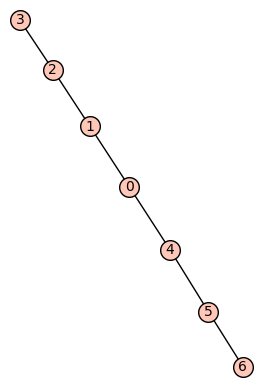

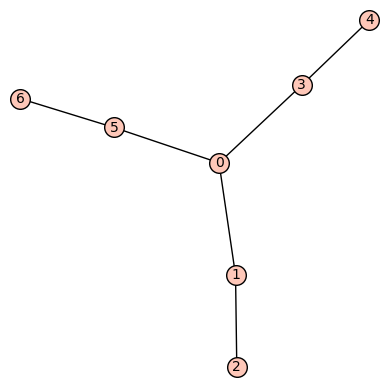

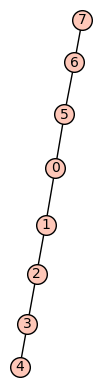

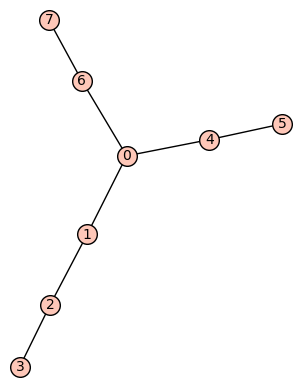

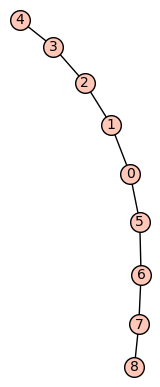

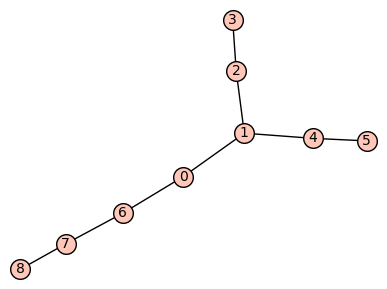

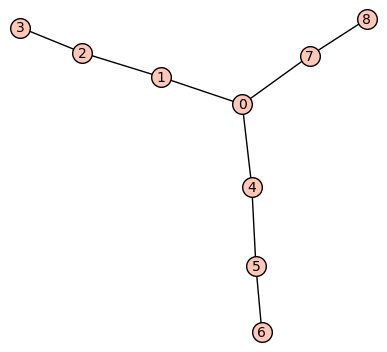

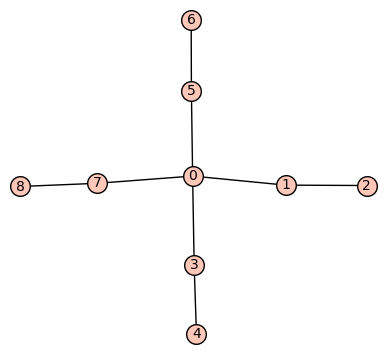

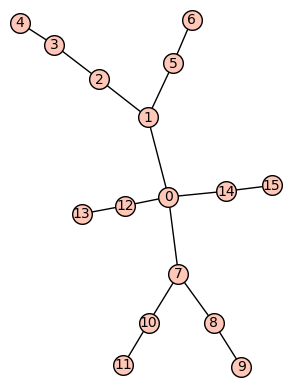

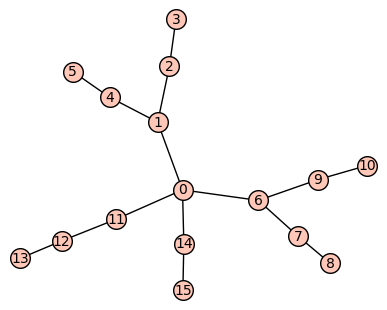

In [7]:
for (vrednost, seznam) in rezultati:
    if len(seznam) > 1:
        for graf in seznam:
            show(graf)
    